In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

In [13]:
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]

In [39]:
y = np.random.randn(1000)

In [40]:
fft_y = np.fft.fft(y)

In [51]:
ifft_y = np.copy(fft_y)
ifft_y[450:-450] = 0

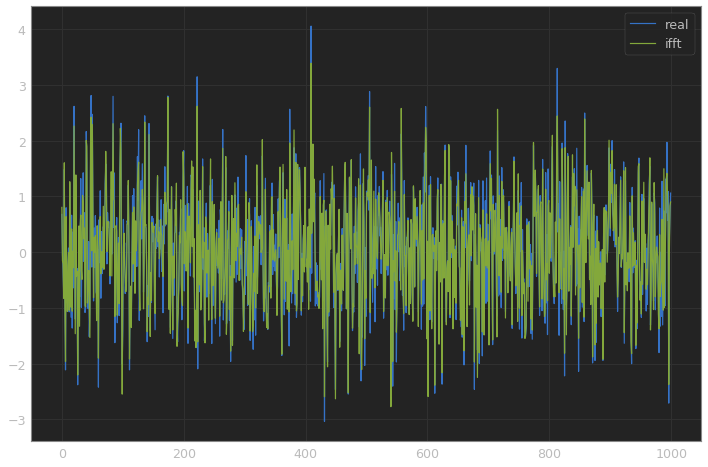

In [52]:
plt.plot(y, label="real")
plt.plot(np.fft.ifft(ifft_y), label="ifft")
plt.legend()